### Generates Error strips figures

In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import h5py
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import sys

In [3]:
diffmap_17 = ["#FF0000", "#F81318", "#F12731", "#EB3B4A", "#EB5C66", "#EB7D82", 
              "#EB9E9E", "#F1BEBE", "#F8DEDE", "#FFFFFF", "#DDDCFD", "#BCB9FB", 
              "#9B96FA", "#6A6CFA", "#3A43FA", "#1D21FC", "#0000FF", "#0000ce"]

diffJM = ["#FF0000", "#F81318", "#F12731", "#EB3B4A", "#EB5C66", "#EB7D82", 
              "#EB9E9E", "#F1BEBE", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#BCB9FB", 
              "#9B96FA", "#6A6CFA", "#3A43FA", "#1D21FC", "#0000FF", "#0000ce"]

diffmap_17_colormap = matplotlib.colors.ListedColormap(diffJM)

file_name = 'e:/data_turbines/states.csv'

sites = pd.read_csv(file_name)
sites.columns

Index(['site', 'Lat', 'Lon', 'state', 'Lat_trunc', 'Lon_trunc', 'numero_site',
       'MLP', 'CNN_sep', 'RF_MIMO', 'diff', 'diff1', 'Persistence', 'Mean',
       'Var'],
      dtype='object')

In [4]:
def plot_accuracy(site, arch, mode_arch, save=False):
   
   s = math.trunc(int(site) / 500)  
   site = str(s)+'-'+site+'-12'
   print(site,arch,site)

   f = h5py.File('e:/data_turbines/errors'+mode_arch+'-S'+site+'-1-12-R0.hdf5', 'r+')
   val_y = f['/errors/val_yu']
   val_yp = f['/errors/val_ypu']
   
   err = val_y[()] - val_yp[()]

   nvals = val_y.shape[0] # ojo 8755 o 8752 para persistencia
   prop = 100
   pixels = np.zeros((12*prop, nvals))

   for i in range(12):
      for j in range(prop):
         pixels[(i*prop) + j,:] = err[:nvals,i]

   pixels[0,0] = -np.max(pixels)

   fig = plt.figure(figsize=(20,10))
   ax = plt.axes()

   def y_yhat(n):
      return(n/100)
   def yhat_y(n):
      return(n*100)


   def x_xhat(n):
      return(n/(24))
   def xhat_x(n):
      return(n*(24))

   parsed_site = site.split('-')
   a = sites.loc[sites['numero_site'] == int(parsed_site[1])]
   c=a.reset_index(drop=True)
   Lat = c.iloc[[0]].Lat_trunc.values[0]
   Lon = c.iloc[[0]].Lon_trunc.values[0]
   Sta = c.iloc[[0]].state.values[0]
   mean_site = c.iloc[[0]].Mean.values[0]
   var_site  = c.iloc[[0]].Var.values[0]

   if arch == 'MLP':
       accuracy_site = c.iloc[[0]].MLP.values[0]
   if arch == 'CNN-sep-2L':
       accuracy_site = c.iloc[[0]].CNN_sep.values[0]
   if arch == 'RF_MIMO':
       accuracy_site = c.iloc[[0]].RF_MIMO.values[0]
   if arch == 'Persistence':
       accuracy_site = c.iloc[[0]].Persistence.values[0]
        

   print('Accuracy_site', accuracy_site)   
   
   Name = ' [' + str(Lat)+', '+ str(Lon) +'] '+ str(Sta)

#ax.set_ylabel('prediction (12 steps)')
   ax.yaxis.set_ticklabels([])
   ax.set_xlabel('steps')
   secay = ax.secondary_yaxis('left',functions=(y_yhat, yhat_y))
   secay.set_ylabel('Pred 12 steps ahead')

   secax = ax.secondary_xaxis('top',functions=(x_xhat, xhat_x))
   secax.set_xlabel('day')
#   im = ax.imshow(pixels,cmap=diffmap_17_colormap)
   im = ax.imshow(pixels, cmap = "seismic")
   im.set_clim(vmin=-15, vmax=15)
   plt.colorbar(im, fraction=0.006, pad=0.04,label="absolute error [m/s]")
   parsed_site = site.split('-')
   plt.title('Accuracy graph site ' + parsed_site[1]+ Name + ' / architecture: ' + arch + 
             "- $(R^2$:{0:.3f})".format(accuracy_site)+' Mean {0:.2f}m/s / '.format(mean_site)+
             'Var {0:.2f}'.format(var_site))
   if save == True:
      plt.savefig(parsed_site[1]+'_accuracy_'+arch+'.pdf', format='pdf')
   plt.show()
   return

62-31321-12 CNN-sep-2L 62-31321-12
Accuracy_site 9.614645676


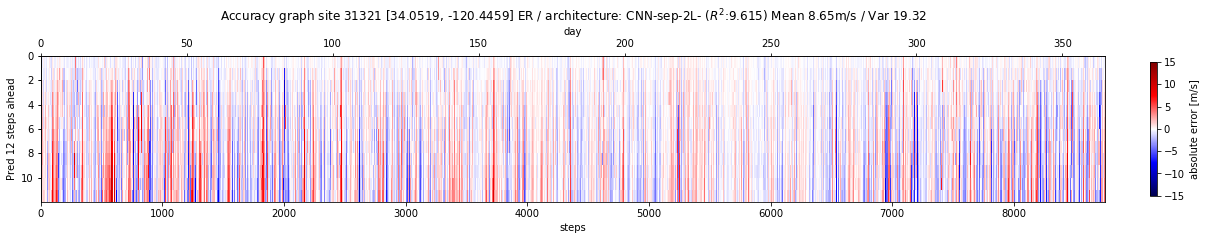

203-101620-12 CNN-sep-2L 203-101620-12
Accuracy_site 9.672521693


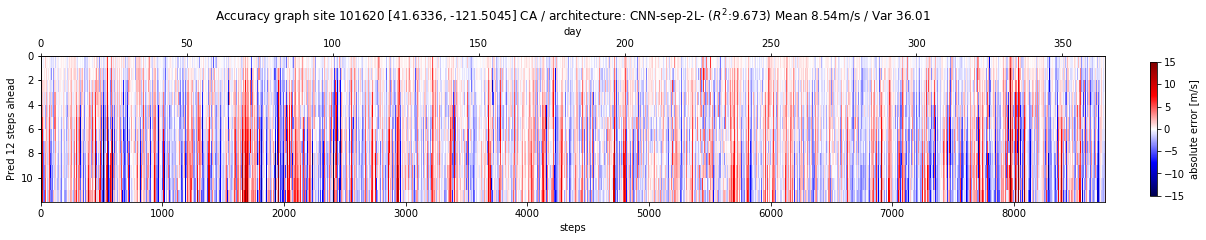

218-109115-12 CNN-sep-2L 218-109115-12
Accuracy_site 9.52802035


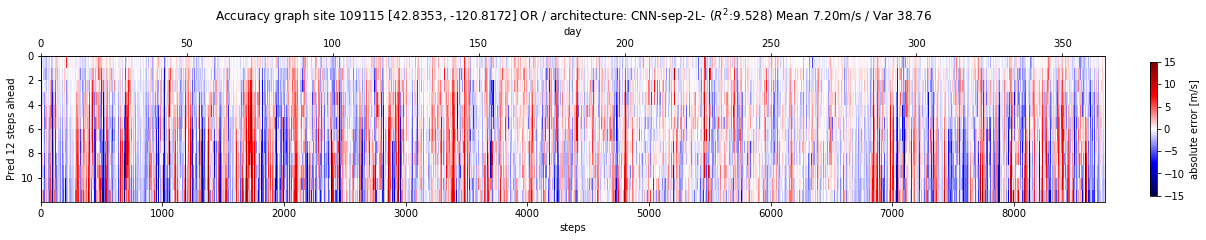

47-23633-12 CNN-sep-2L 47-23633-12
Accuracy_site 9.479840925


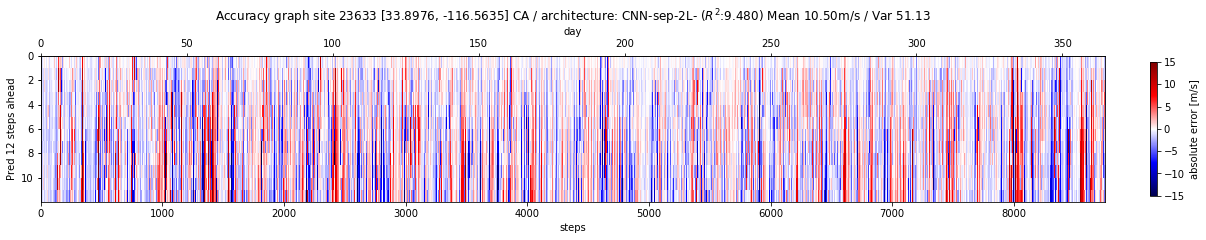

112-56348-12 CNN-sep-2L 112-56348-12
Accuracy_site 9.232627783


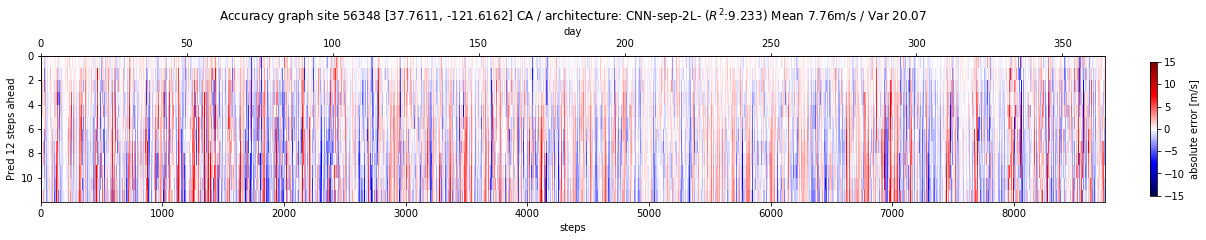

2-1434-12 CNN-sep-2L 2-1434-12
Accuracy_site 9.135425255


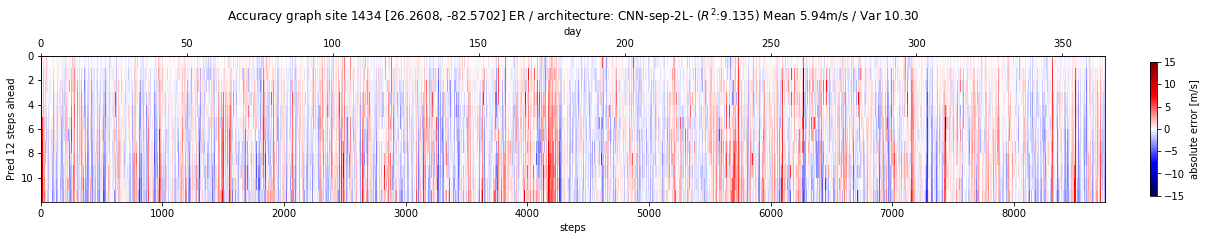

202-101242-12 CNN-sep-2L 202-101242-12
Accuracy_site 4.831301749


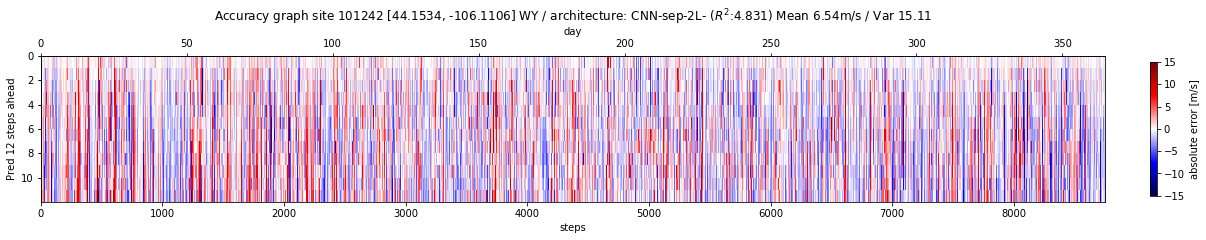

102-51361-12 CNN-sep-2L 102-51361-12
Accuracy_site 4.164570178


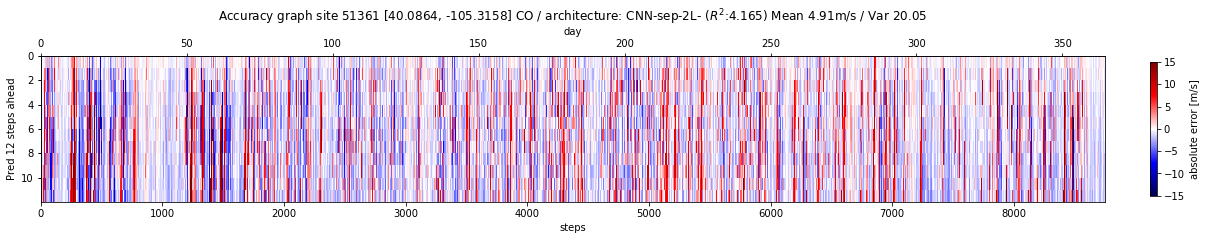

72-36471-12 CNN-sep-2L 72-36471-12
Accuracy_site 4.055404127


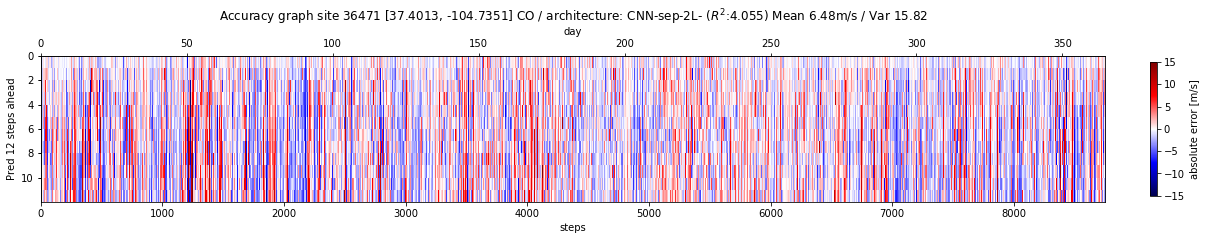

100-50464-12 CNN-sep-2L 100-50464-12
Accuracy_site 4.680057777


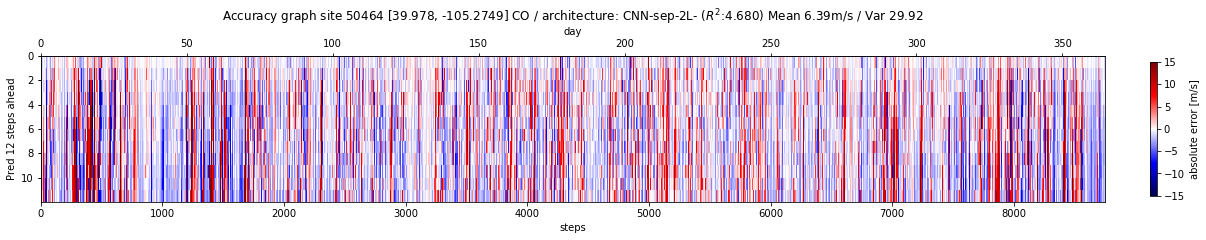

0-152-12 MLP 0-152-12
Accuracy_site 8.972110811


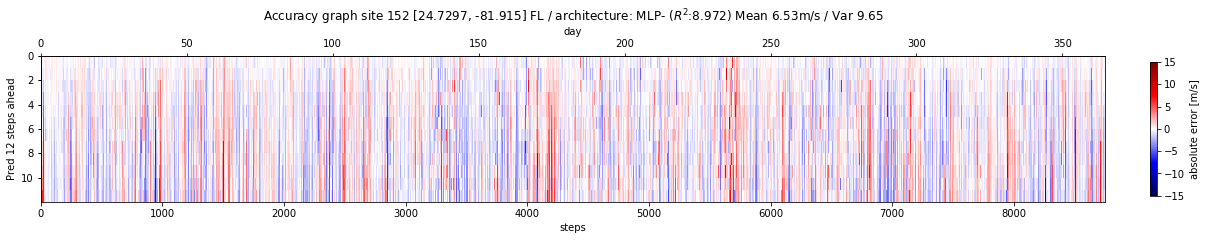

0-232-12 MLP 0-232-12
Accuracy_site 8.953613675


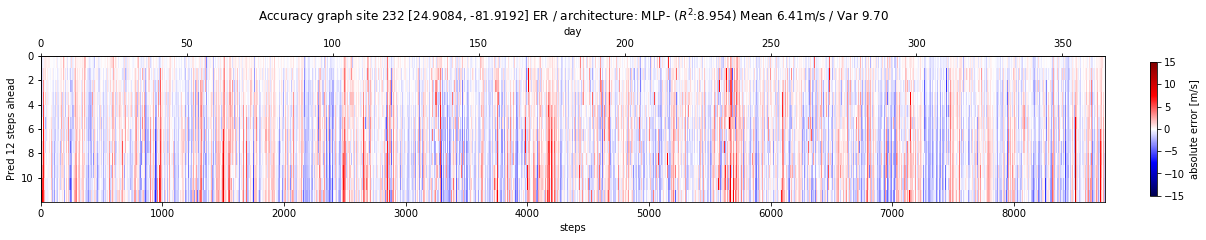

3-1534-12 MLP 3-1534-12
Accuracy_site 9.018639716000001


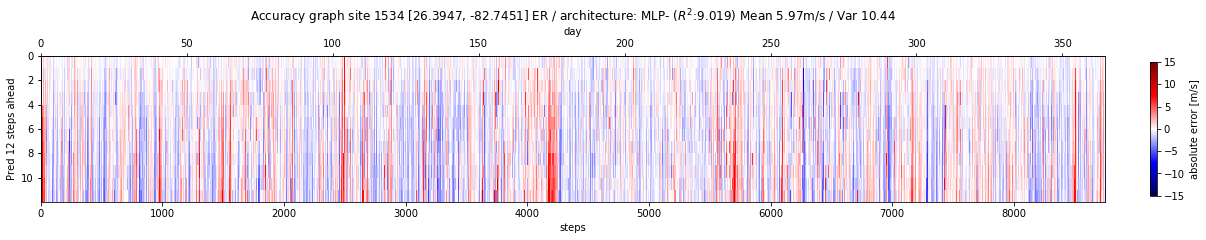

17-8802-12 MLP 17-8802-12
Accuracy_site 4.5786719069999995


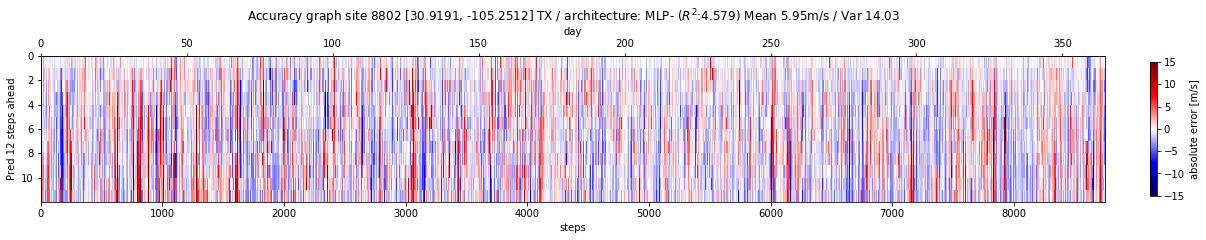

24-12499-12 MLP 24-12499-12
Accuracy_site 4.639994061


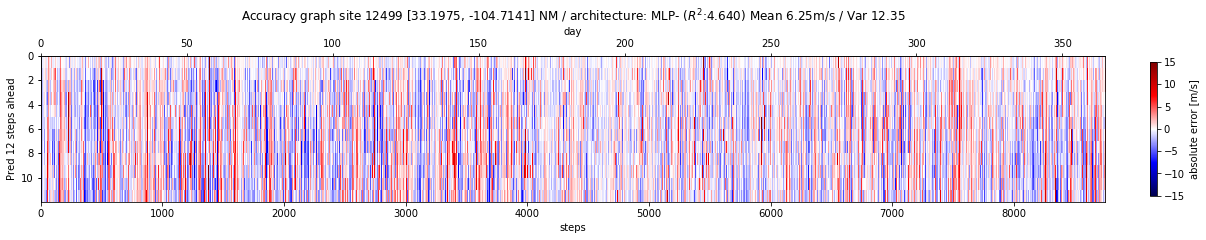

47-23770-12 MLP 47-23770-12
Accuracy_site 8.946579921


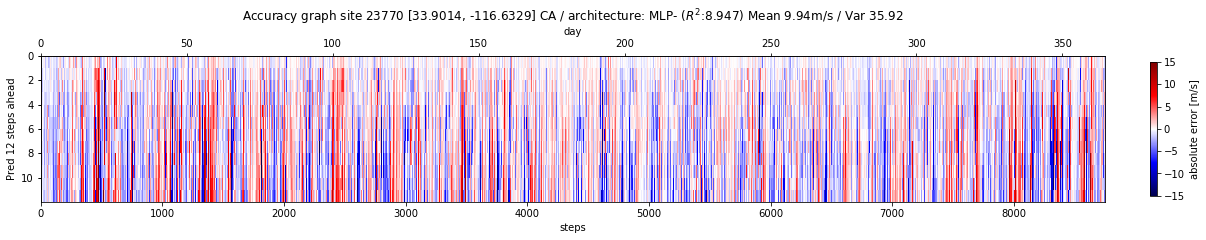

54-27274-12 MLP 54-27274-12
Accuracy_site 4.987202485


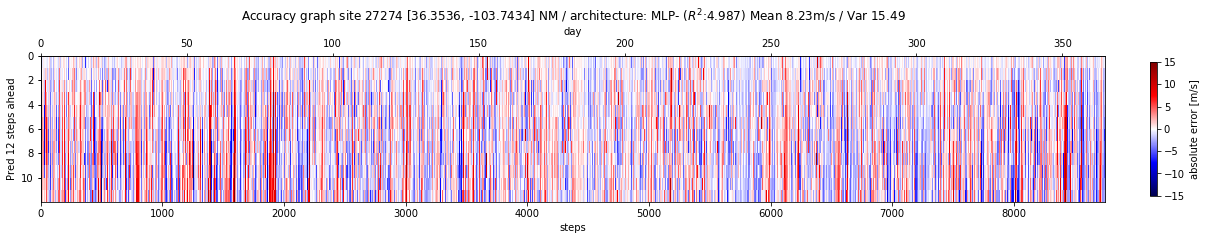

83-41965-12 MLP 83-41965-12
Accuracy_site 4.394794266


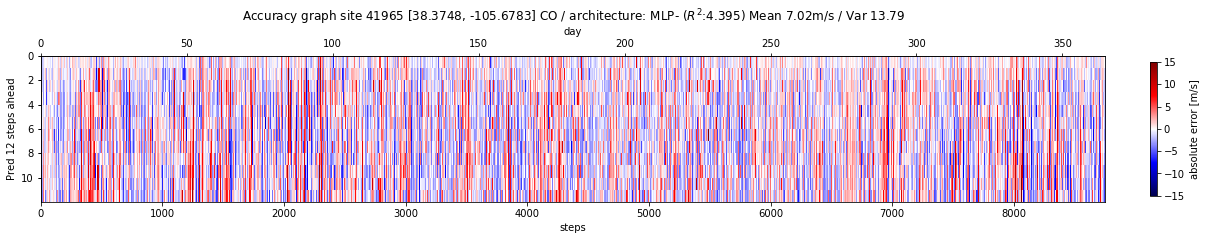

83-41969-12 MLP 83-41969-12
Accuracy_site 4.811147419


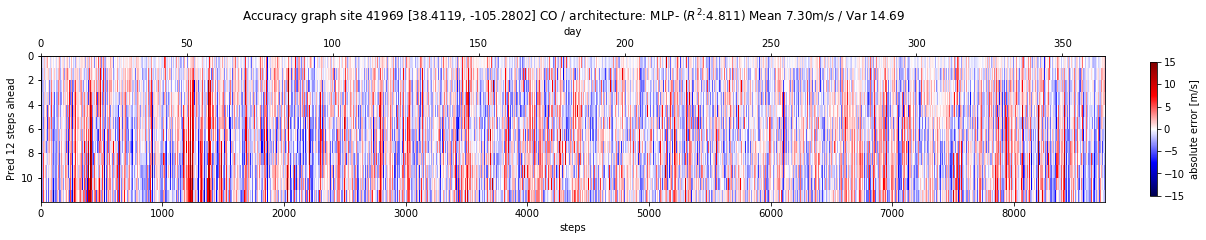

91-45639-12 MLP 91-45639-12
Accuracy_site 4.334507108


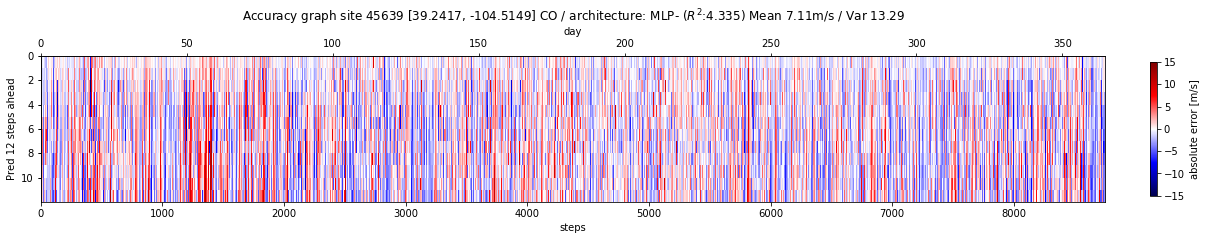

92-46243-12 MLP 92-46243-12
Accuracy_site 3.935184364


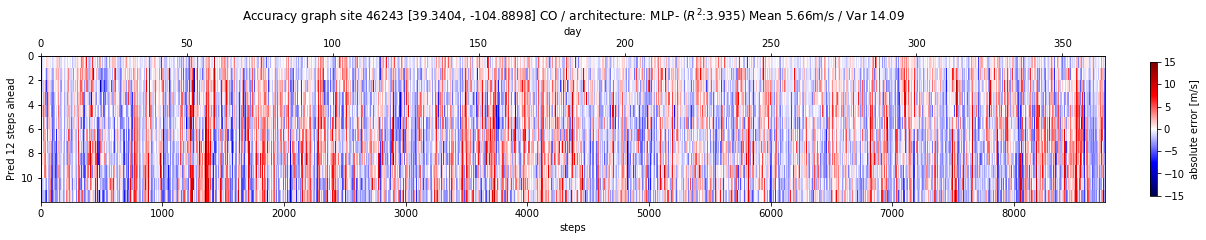

99-49802-12 MLP 99-49802-12
Accuracy_site 4.21046119


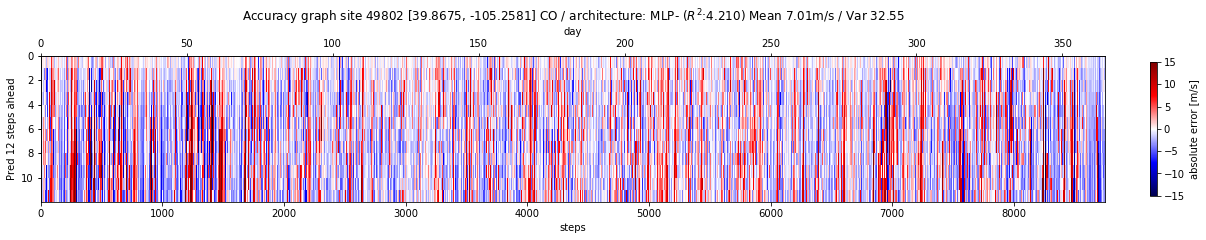

109-54711-12 MLP 109-54711-12
Accuracy_site 4.179387147


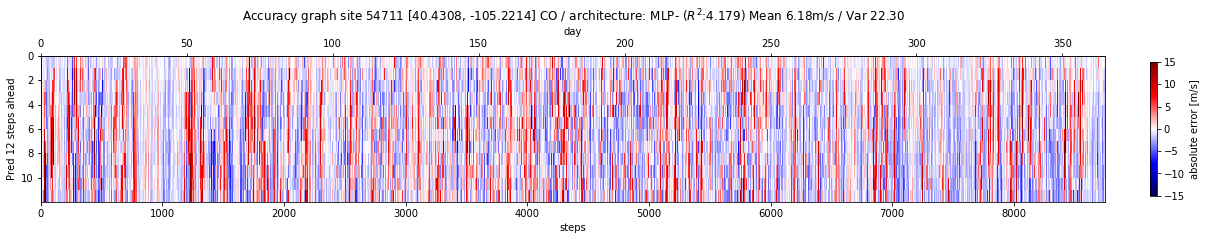

188-94408-12 MLP 188-94408-12
Accuracy_site 8.987178464


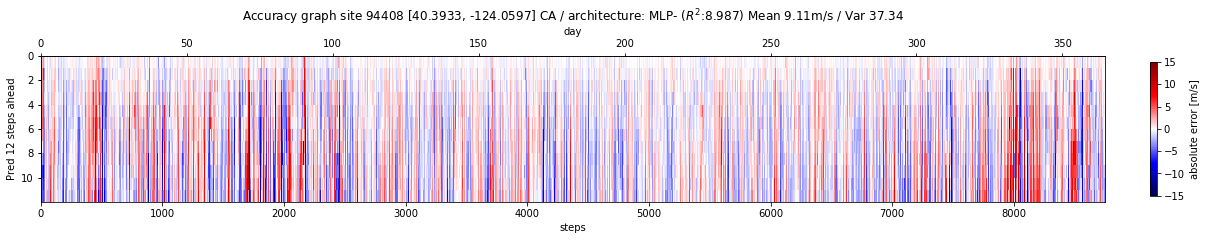

189-94723-12 MLP 189-94723-12
Accuracy_site 4.769502038


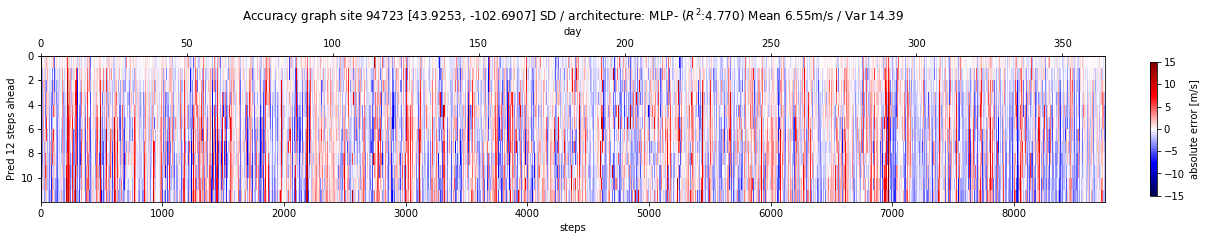

189-94988-12 MLP 189-94988-12
Accuracy_site 4.69248388


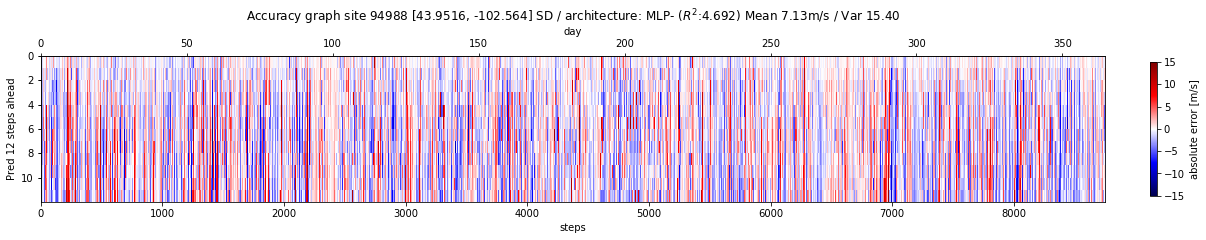

190-95488-12 MLP 190-95488-12
Accuracy_site 9.707196832000001


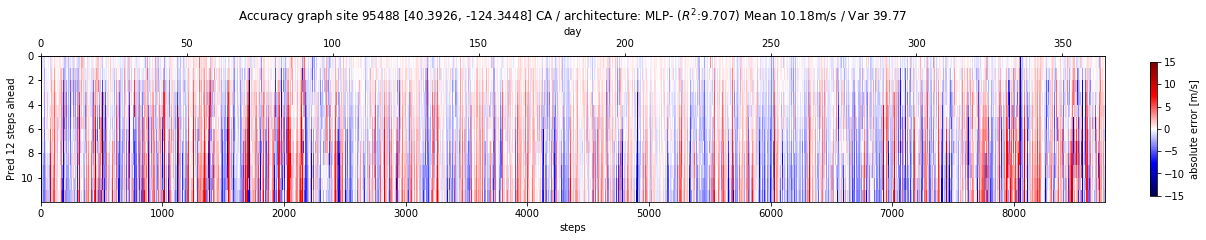

230-115478-12 MLP 230-115478-12
Accuracy_site 8.935483308


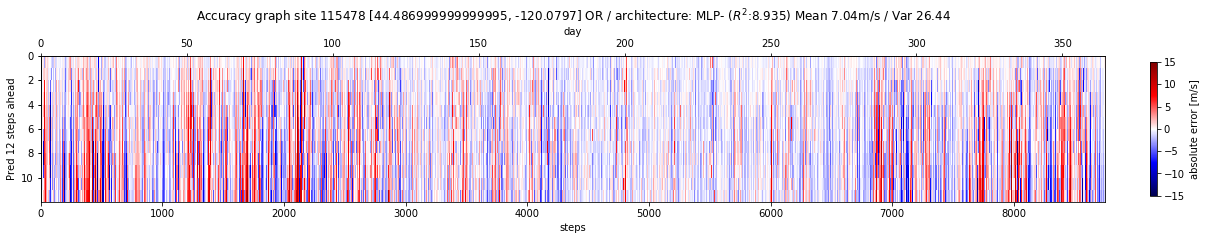

233-116672-12 MLP 233-116672-12
Accuracy_site 8.939537751


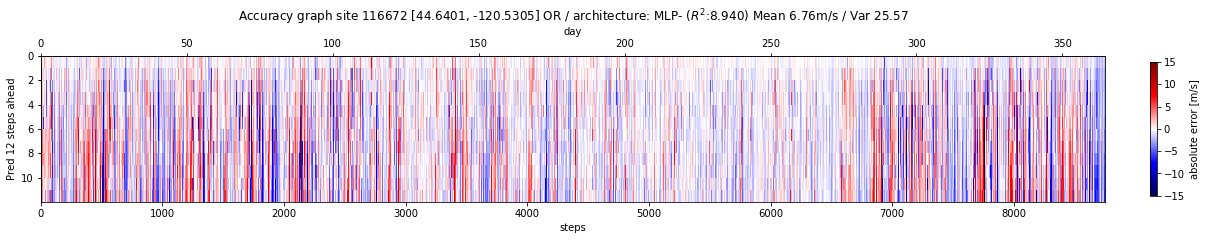

234-117094-12 MLP 234-117094-12
Accuracy_site 9.023150213


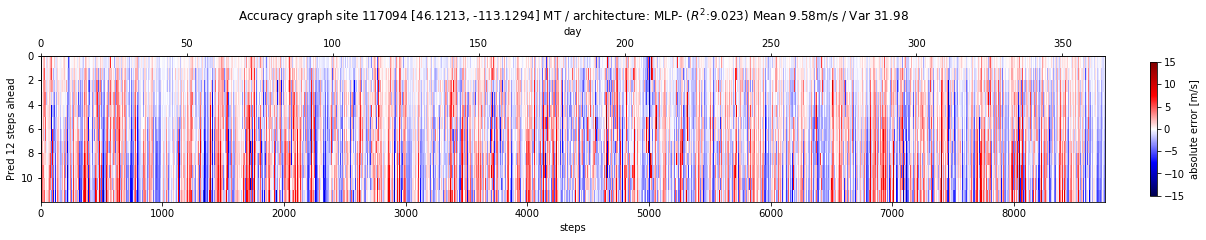

In [5]:
turbines = ['31321','101620', '109115', '23633', '56348', '1434' ,'101242','51361' , '36471','50464',
            '152'  , '232'  ,'1534'   ,'8802'  ,'12499' , '23770', '27274', '41965', '41969', '45639', 
            '46243', '49802', '54711', '94408', '94723', '94988', '95488',  '115478', '116672', '117094']
                


arch = ['CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 
        'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L', 'CNN-sep-2L',  
        'MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP',
       'MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP','MLP' ]

mode = ['CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S','CNNS2S',
        'MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S',
         'MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S','MLPS2S']

zip_files = zip (turbines,arch, mode)

for s, a, m in zip_files: 
    
    plot_accuracy(s,a,m, save=True)

62-31321-12 CNN-sep-2L 62-31321-12
Accuracy_site 9.614645676


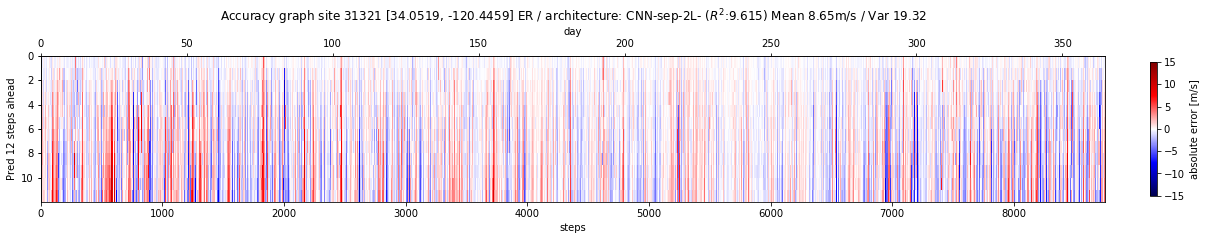

In [6]:
plot_accuracy('31321','CNN-sep-2L', 'CNNS2S', save=False)

62-31321-12 CNN-sep-2L 62-31321-12
Accuracy_site 9.614645676


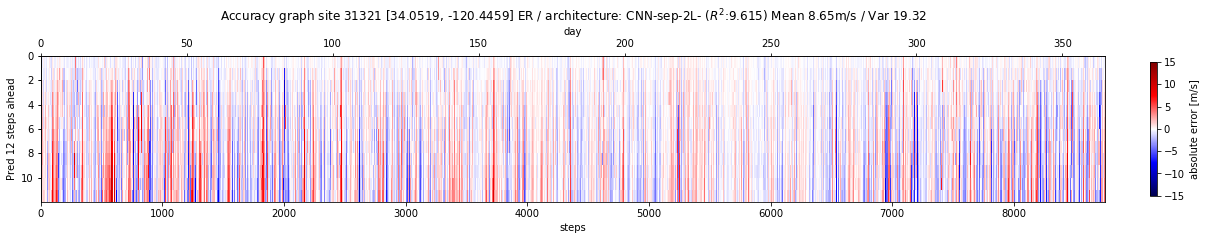

In [7]:
plot_accuracy('31321','CNN-sep-2L', 'CNNS2S', save=False)

11-5794-12 RF_MIMO 11-5794-12
Accuracy_site 7.089778067999999


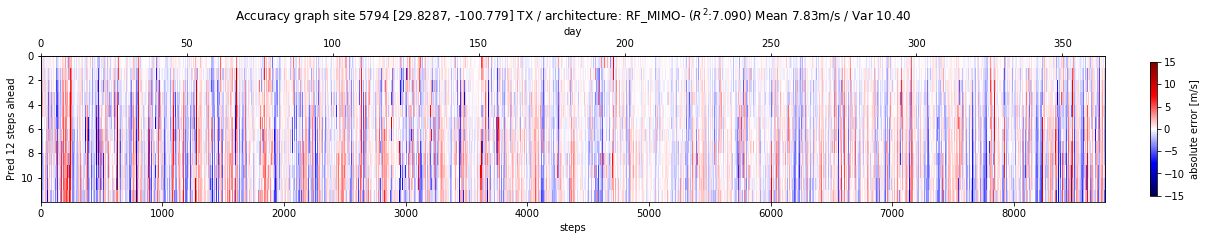

In [8]:
plot_accuracy('5794','RF_MIMO', 'RFS2S', save=False)

11-5794-12 CNN-sep-2L 11-5794-12
Accuracy_site 7.781582305


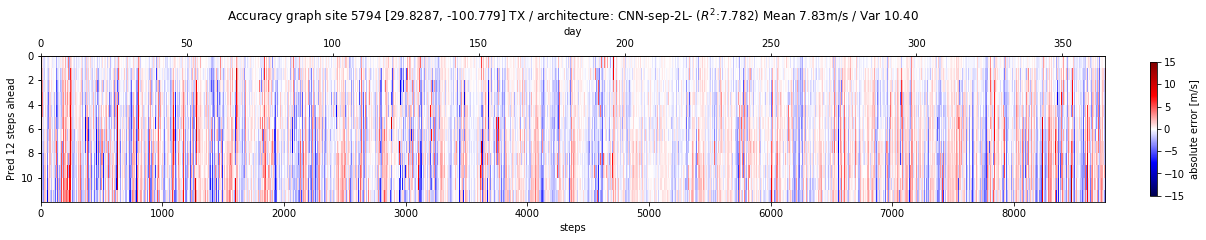

In [9]:
plot_accuracy('5794','CNN-sep-2L', 'CNNS2S', save=False)

46-23019-12 CNN-sep-2L 46-23019-12
Accuracy_site 8.861534567


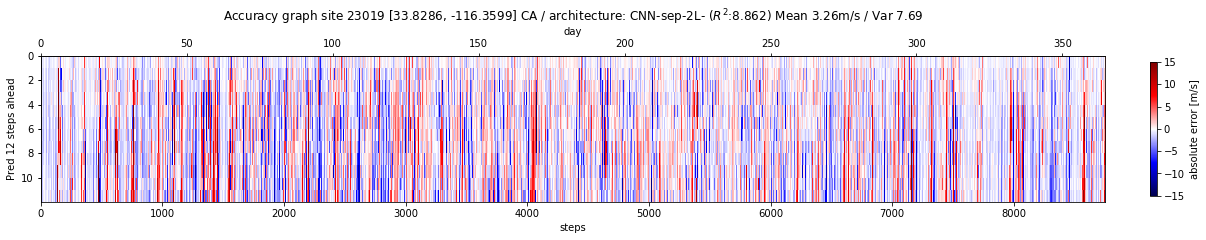

In [10]:
plot_accuracy('23019','CNN-sep-2L', 'CNNS2S', save=False)

46-23019-12 RF_MIMO 46-23019-12
Accuracy_site 8.460191056000001


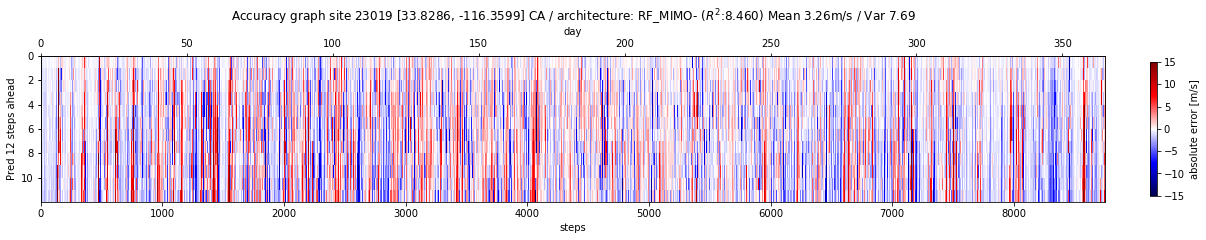

In [11]:
plot_accuracy('23019','RF_MIMO', 'RFS2S', save=False)

237-118728-12 CNN-sep-2L 237-118728-12
Accuracy_site 7.268650365


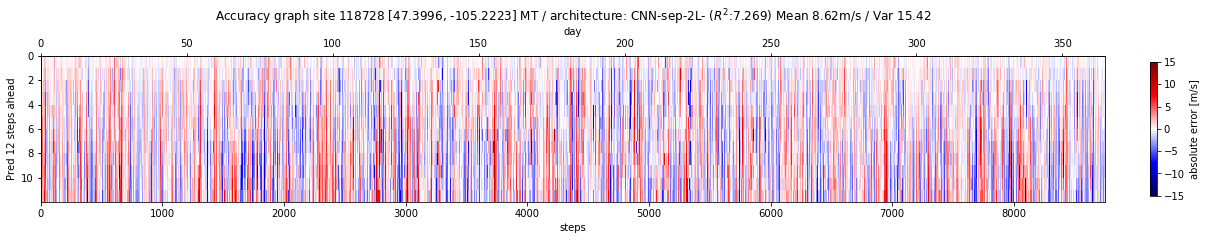

In [12]:
plot_accuracy('118728','CNN-sep-2L', 'CNNS2S', save=False)

237-118728-12 RF_MIMO 237-118728-12
Accuracy_site 6.265282591


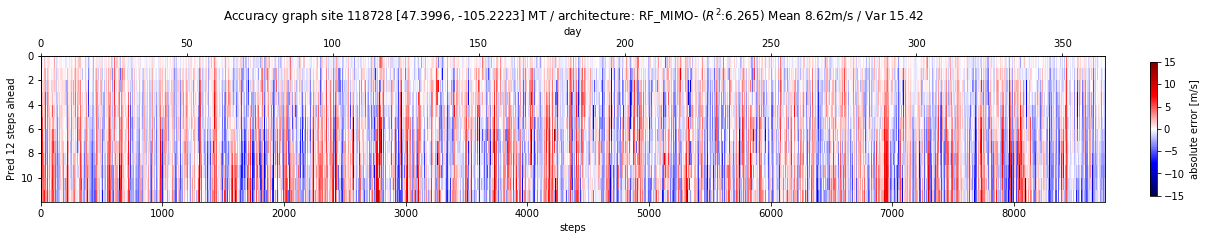

In [13]:
plot_accuracy('118728','RF_MIMO', 'RFS2S', save=False)

92-46325-12 RF_MIMO 92-46325-12
Accuracy_site 3.8645583039999996


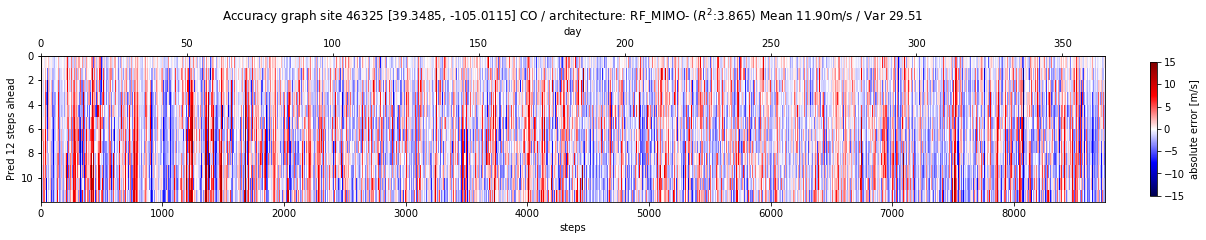

In [14]:
plot_accuracy('46325','RF_MIMO', 'RFS2S', save=False)

92-46325-12 CNN-sep-2L 92-46325-12
Accuracy_site 4.206256334


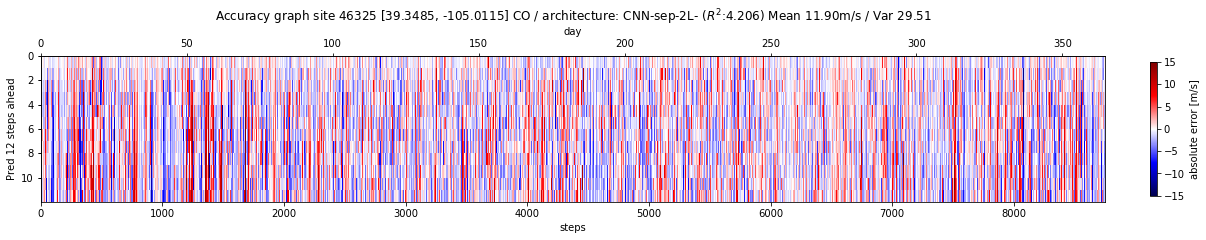

In [15]:
plot_accuracy('46325','CNN-sep-2L', 'CNNS2S', save=False)

92-46325-12 MLP 92-46325-12
Accuracy_site 3.99608379


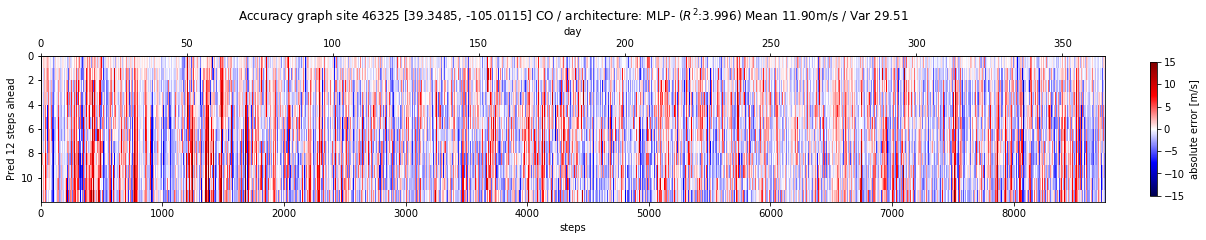

In [16]:
plot_accuracy('46325','MLP', 'MLPS2S', save=False)

92-46325-12 Persistence 92-46325-12
Accuracy_site -2.472025363


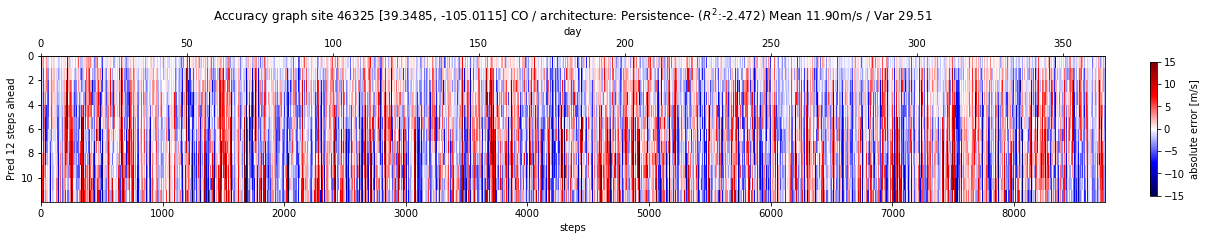

In [17]:
plot_accuracy('46325','Persistence', 'Persistence', save=False)

62-31321-12 Persistence 62-31321-12
Accuracy_site 7.5465775520000005


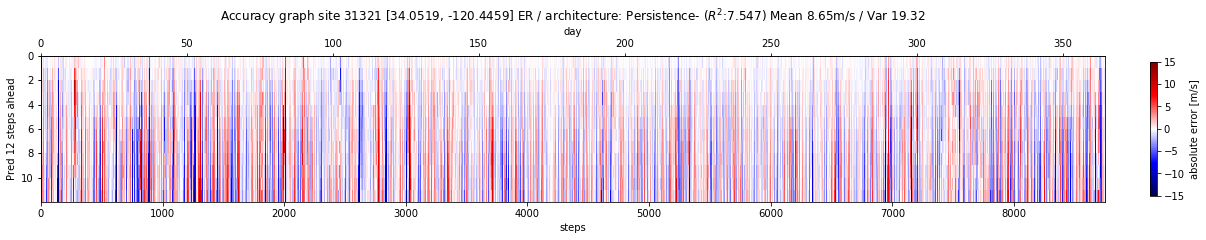

In [18]:
plot_accuracy('31321','Persistence', 'Persistence', save=False)

62-31321-12 CNN-sep-2L 62-31321-12
Accuracy_site 9.614645676


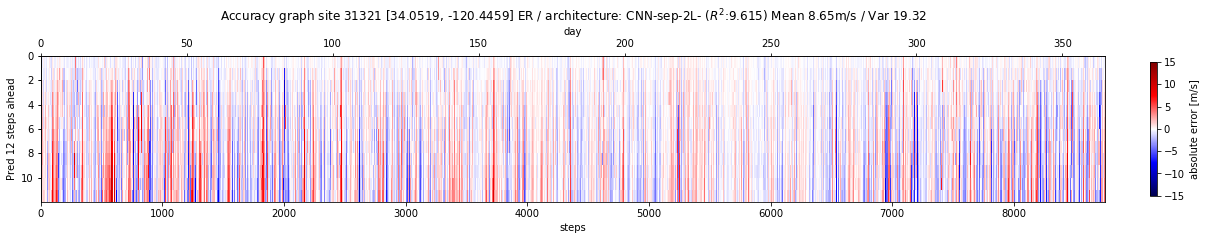

In [19]:
plot_accuracy('31321','CNN-sep-2L', 'CNNS2S', save=False)